In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from binary_classification_workflow import *

In [2]:
#Dictionnary of 6 chosen models 

dict_models = {
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 150, 200],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20],
            'bootstrap': [True, False]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'fit_intercept': [True, False],
            'intercept_scaling': [1, 10, 100]
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 150, 200],
            'algorithm': ['SAMME', 'SAMME.R'],
            'learning_rate': [0.01, 0.1, 0.5, 1]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}


# Kidney Disease Dataset:

### 1. Exploring the Kidney Dataset

In [3]:
df_kidney = pd.read_csv('./data/kidney_disease.csv')
df_kidney.info()

nan_count = df_kidney[df_kidney.isna().any(axis=1)].shape[0]
print(f"Number of rows : {len(df_kidney)}")
print(f"Number of rows with at least one NAN value: {nan_count}")
print(f"{round(nan_count/len(df_kidney) * 100)}% of our rows have at least one"
      f" missing value")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df_kidney.sample(5)

id   age    bp     sg   al   su     rbc      pc         pcc          ba  \
362  362  33.0  80.0  1.025  0.0  0.0  normal  normal  notpresent  notpresent   
280  280  47.0  80.0    NaN  NaN  NaN     NaN     NaN  notpresent  notpresent   
52    52  53.0  90.0  1.015  0.0  0.0     NaN  normal  notpresent  notpresent   
150  150   8.0  60.0  1.025  3.0  0.0  normal  normal  notpresent  notpresent   
239  239  34.0  90.0  1.015  2.0  0.0  normal  normal  notpresent  notpresent   

     ...  pcv     wc   rc  htn  dm  cad appet   pe  ane classification  
362  ...   40  10300  4.8   no  no   no  good   no   no         notckd  
280  ...   52   8100  5.2   no  no   no  good   no   no         notckd  
52   ...   34   4300  3.7   no  no   no  poor   no  yes            ckd  
150  ...   41   6700  NaN   no  no   no  poor  yes   no            ckd  
239  ...   39    NaN  NaN   no  no   no  good   no   no            ckd  

[5 rows x 26 columns]

The dataset is noisy as it contains NaN values in some columns, and it requires the following preprocessing steps:

- Correctly renaming the categories of the columns by replacing certain characters and deleting white spaces.
- Dropping the 'id' column as it is not relevant for the classification task.
- Filling in the missing values.
- Scaling and normalizing the numerical columns of the dataset.

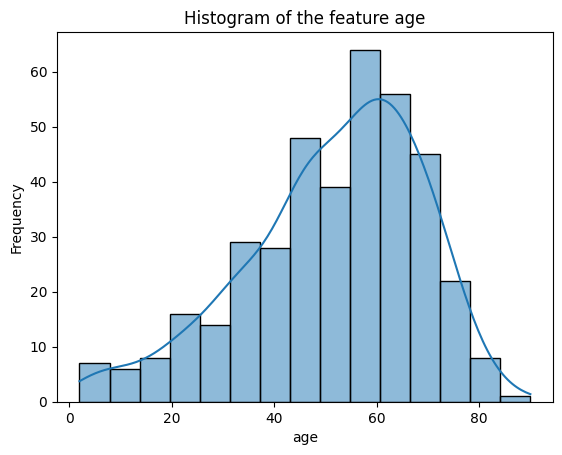

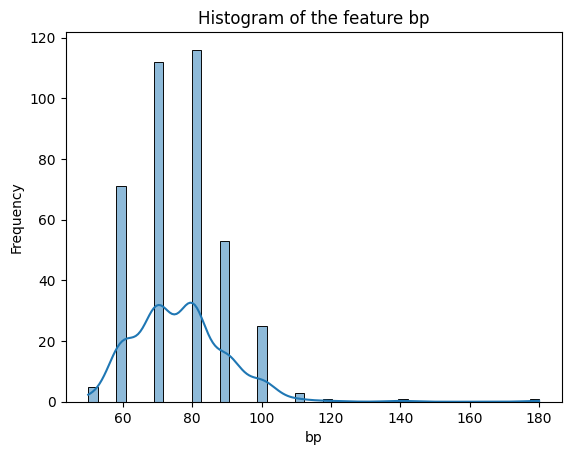

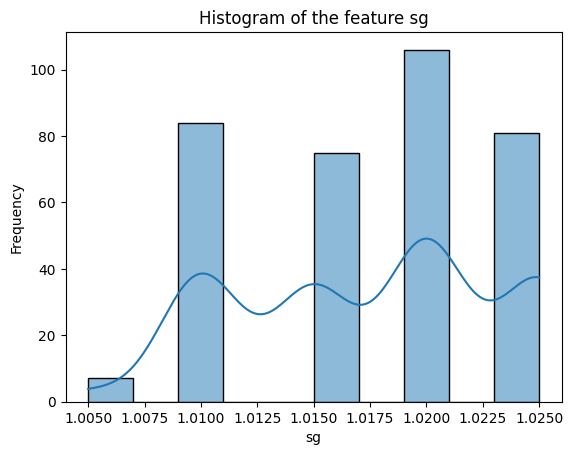

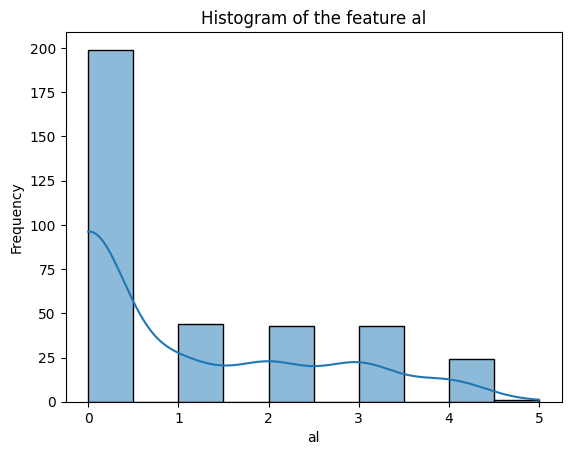

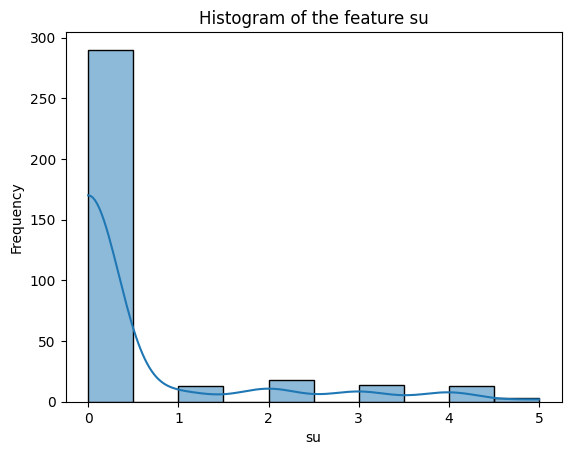

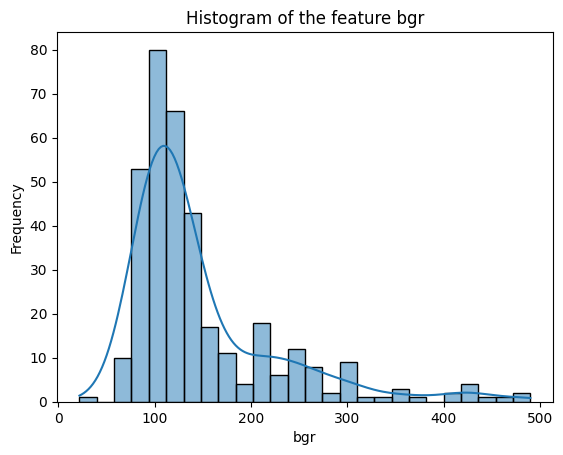

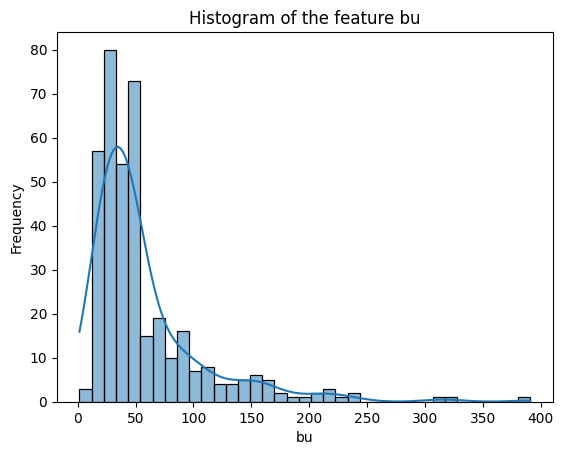

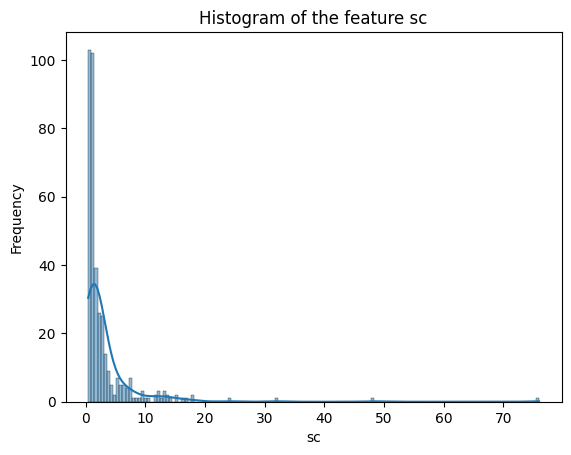

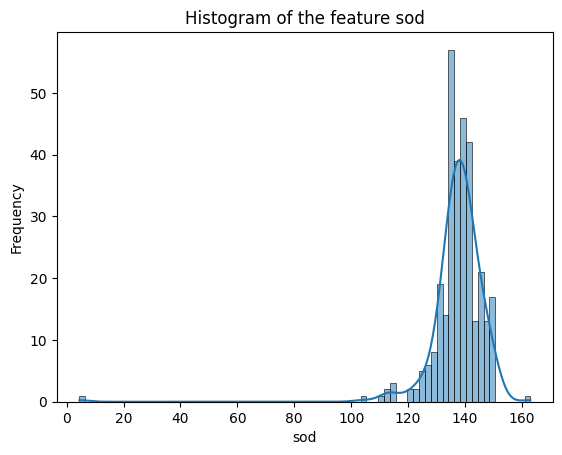

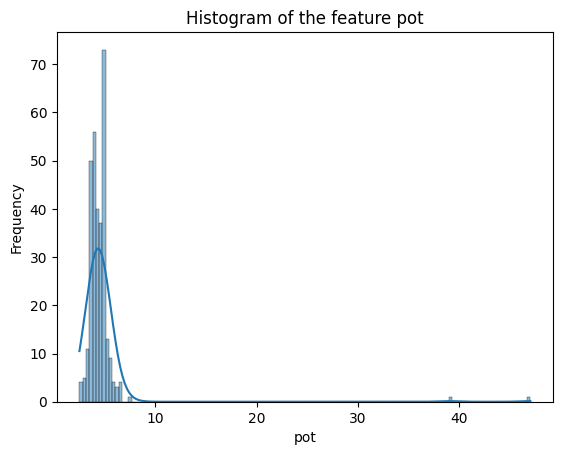

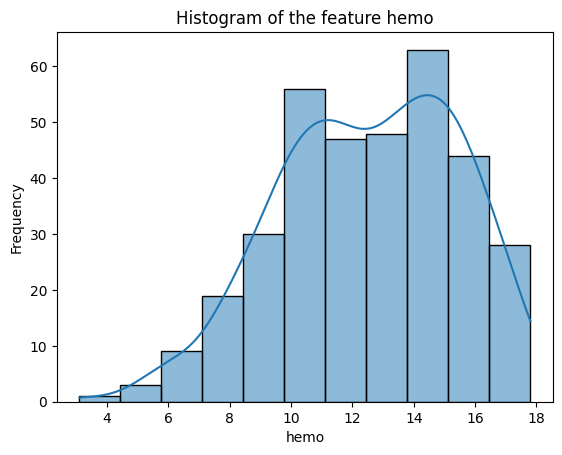

In [5]:
# visualise_numerical_data(df_kidney)
numerical_columns = get_numerical_columns(df_kidney)
visualise_numerical_data(df_kidney,columns=numerical_columns)

In [6]:
df_kidney = pre_process_data(df_kidney)

#######BEFORE SCALING AND NORMALIZING########
              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  381.000000  383.000000  313.000000  312.000000  348.000000  
mean    57.425722    3.072454  137.528754    4.627244   12.526437  
std     50.503006   

Going through each categorical feature...: 100%|██████████| 14/14 [00:00<00:00, 675.57it/s]


Processing column: rbc
Possible categories and their frequencies:
rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64

Processing column: pc
Possible categories and their frequencies:
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64

Processing column: pcc
Possible categories and their frequencies:
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64

Processing column: ba
Possible categories and their frequencies:
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64

Processing column: pcv
Possible categories and their frequencies:
pcv
41    0.063830
52    0.063830
44    0.057751
48    0.057751
40    0.048632
43    0.045593
42    0.039514
45    0.039514
32    0.036474
50    0.036474
36    0.036474
33    0.036474
28    0.036474
34    0.033435
37    0.033435
30    0.027356
29    0.027356
35    0.027356
46    0.027356
31    0.024316
24    0.021277
39    0.021277
26    0.018

In [7]:
df_kidney.sample()

age       bp        sg        al        su  rbc  pc  pcc  ba  \
69 -1.486107 -0.47337 -0.421814 -0.752868  3.234128    1   1    0   0   

         bgr  ...  rc_5.7  rc_5.8  rc_5.9  rc_6.0  rc_6.1  rc_6.2  rc_6.3  \
69  1.287901  ...       0       0       0       1       0       0       0   

    rc_6.4  rc_6.5  rc_8.0  
69       0       0       0  

[1 rows x 201 columns]

In [8]:
df_kidney.isna().sum()

age       0
bp        0
sg        0
al        0
su        0
         ..
rc_6.2    0
rc_6.3    0
rc_6.4    0
rc_6.5    0
rc_8.0    0
Length: 201, dtype: int64

### 2. Preparing the dataset for model training and model testing

We're first going to apply PCA to reduce the dimensionnality of the dataset, using a threshold variance ratio of 0.90

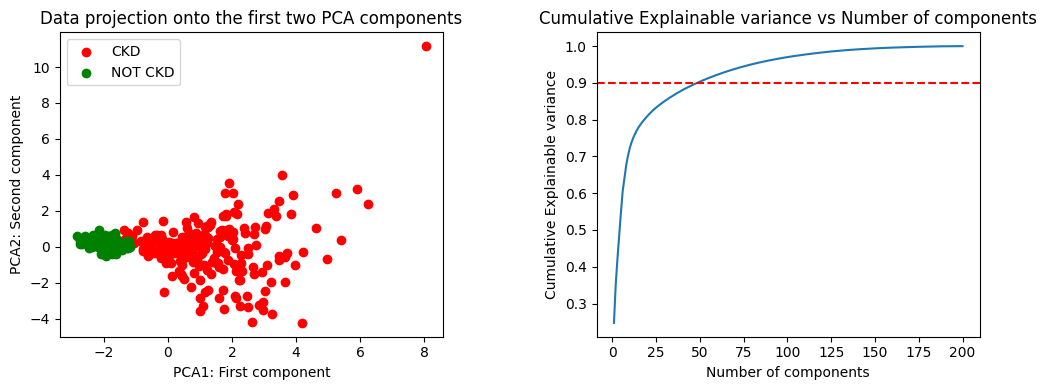

In [9]:
X_train, X_test, y_train, y_test, cv = prepare_training_data(df_kidney, 'classification', use_pca=True, threshold_variance_ratio=0.90)

The two classes are distinguishable if we project the feature space onto the first two PCA's eigenvectors. We also observe that, we're only keeping almost 1/4 of the PCA columns which is enough to explain 0.90 of the data.

Going through each model defined in the dictionnary...:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 48 candidates, totalling 240 fits


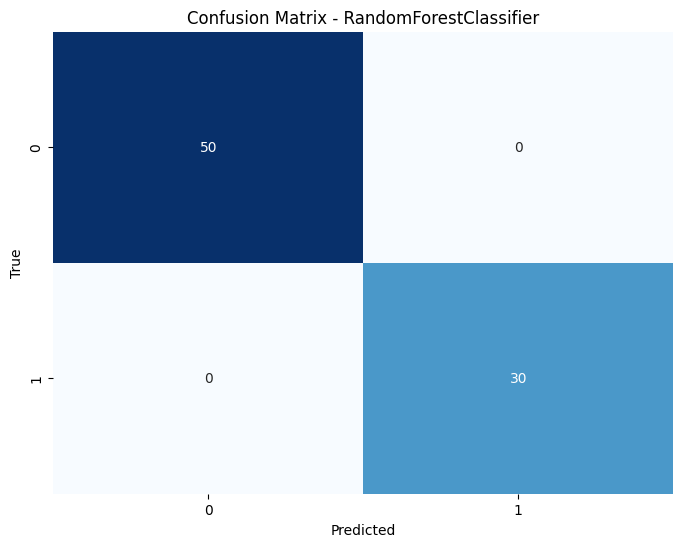

Model: RandomForestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC-AUC: 1.0




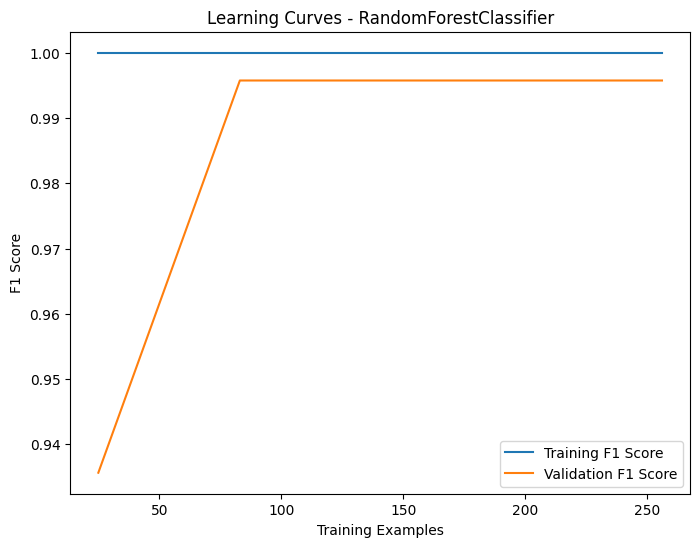

Going through each model defined in the dictionnary...:  17%|█▋        | 1/6 [00:07<00:38,  7.61s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


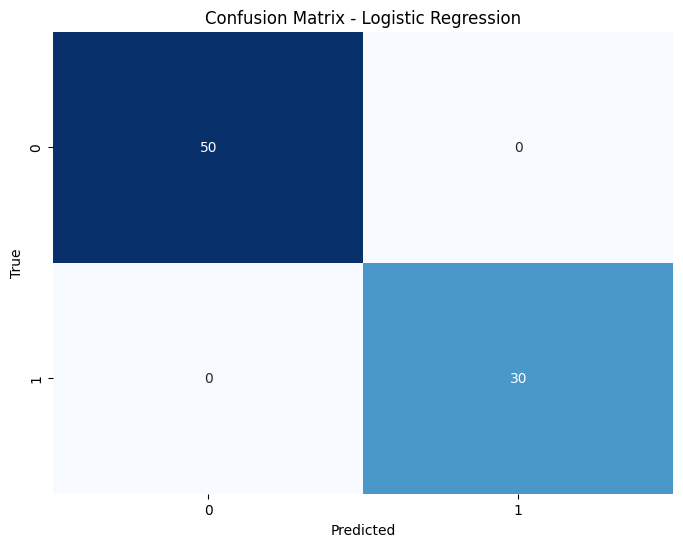

Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC-AUC: 1.0




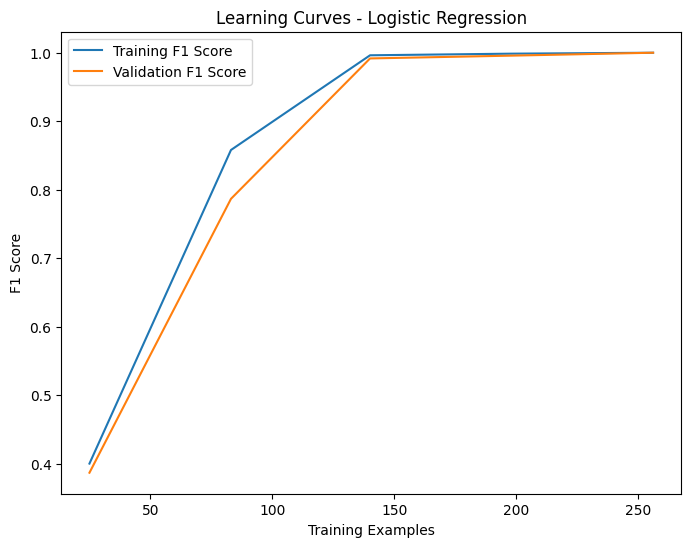

Going through each model defined in the dictionnary...:  33%|███▎      | 2/6 [00:08<00:13,  3.40s/it]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


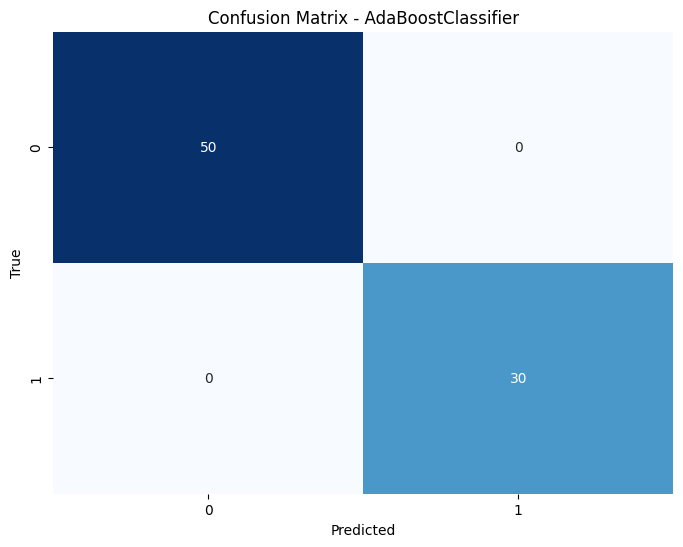

Model: AdaBoostClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC-AUC: 1.0




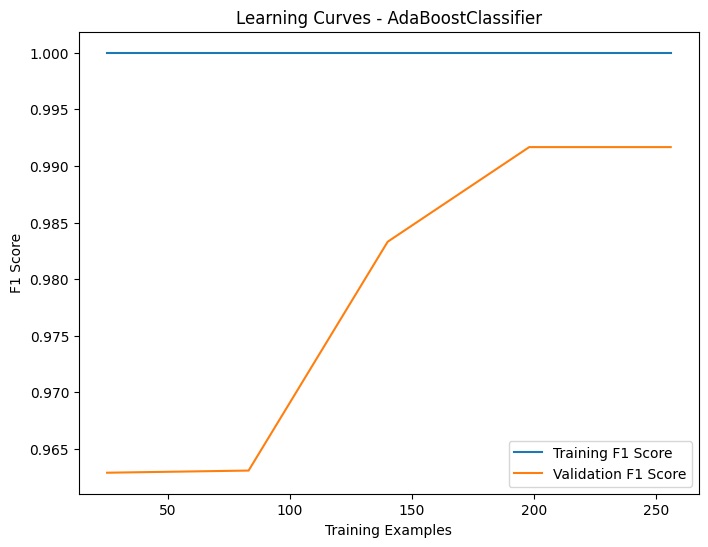

Going through each model defined in the dictionnary...:  50%|█████     | 3/6 [00:15<00:15,  5.23s/it]

Fitting 5 folds for each of 24 candidates, totalling 120 fits


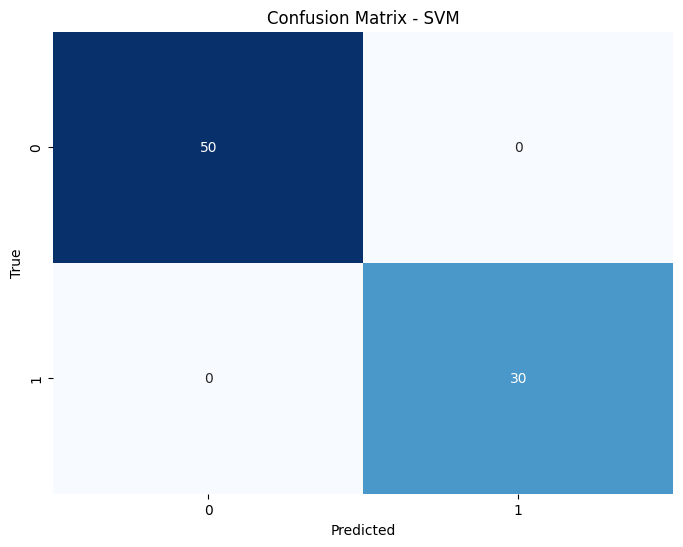

Model: SVM
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC-AUC: 1.0




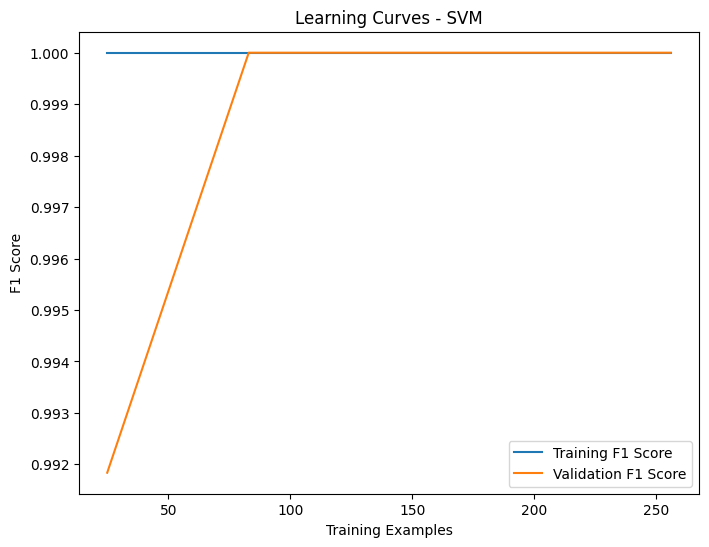

Going through each model defined in the dictionnary...:  67%|██████▋   | 4/6 [00:16<00:06,  3.38s/it]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


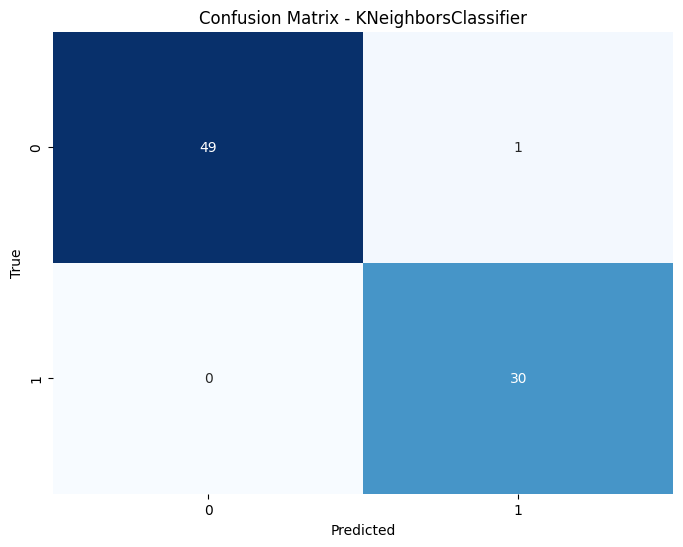

Model: KNeighborsClassifier
Accuracy: 0.9875
Precision: 0.967741935483871
Recall: 1.0
ROC-AUC: 1.0




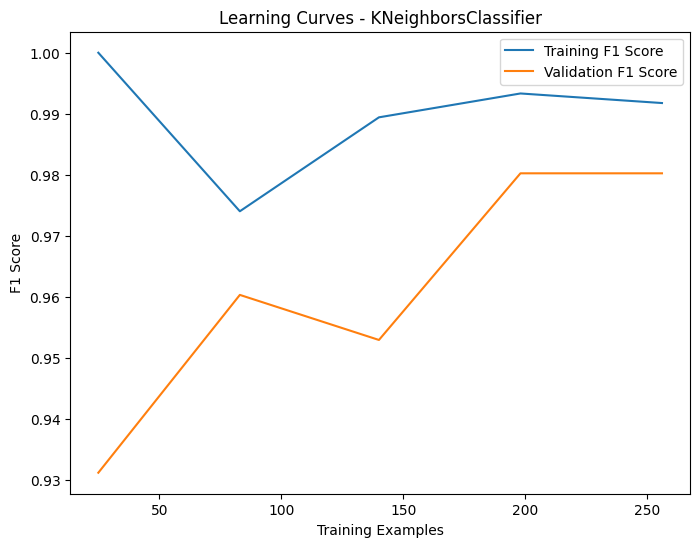

Going through each model defined in the dictionnary...:  83%|████████▎ | 5/6 [00:16<00:02,  2.29s/it]

Fitting 5 folds for each of 54 candidates, totalling 270 fits


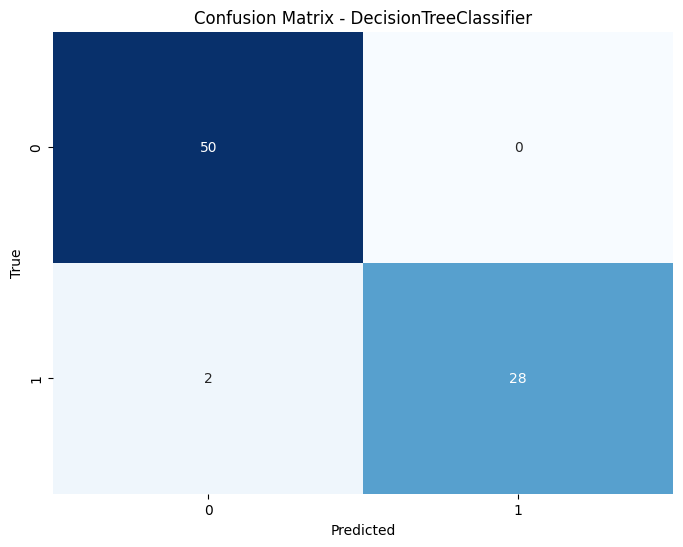

Model: DecisionTreeClassifier
Accuracy: 0.975
Precision: 1.0
Recall: 0.9333333333333333
ROC-AUC: 0.9666666666666667




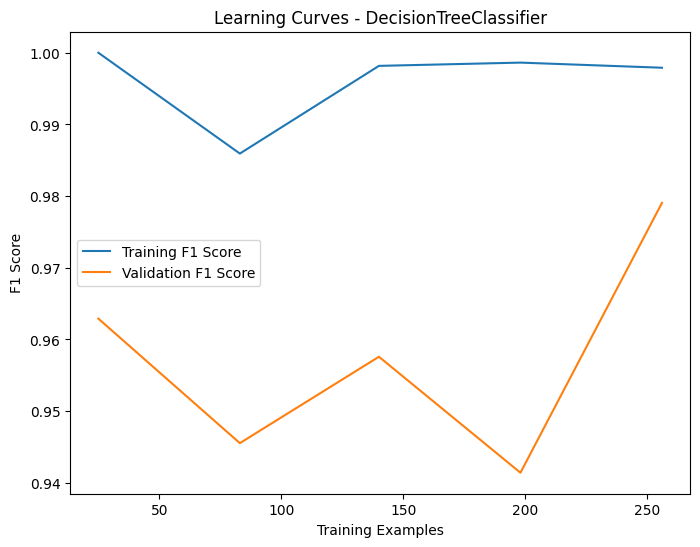

Going through each model defined in the dictionnary...: 100%|██████████| 6/6 [00:16<00:00,  2.81s/it]


In [11]:
display_results(dict_models, X_train, y_train, X_test, y_test, cv, 'f1 scoring on Kidney data(%)')

**Comments on Model performance**

We have chosen six distinct classifiers for our classification task: RandomForestClassifier, LogisticRegression, AdaBoostClassifier, SVM, KNeighborsClassifier, and DecisionTreeClassifier. To optimize their performance, we initiate a grid-search to fine-tune their parameters, coupled with cross-validation during the training phase.

For each model, we exhaustively explore all possible combinations of hyperparameters (defined in the dictionnary), conducting cross-validation to calculate the training score on the training data for each combination. The objective is to identify the parameter combination that yields the highest cross-validation score, and we subsequently adopt the associated hyperparameters.

To assess the models' performance, we employ various metrics, including F1 score, accuracy, precision, recall, and ROC-AUC scores, on the test datasets. Our analysis reveals that RandomForestClassifier, LogisticRegression, AdaBoostClassifier, and SVM outperform the remaining two classifiers in the set with a scoring of 100% in each metric.

# Bank notes Dataset:

In [12]:
df_bank = pd.read_csv('./data/data_banknote_authentication.txt', header=None, names=["col1", "col2", "col3", "col4", "classification"])
df_bank.info()

nan_count = df_bank[df_bank.isna().any(axis=1)].shape[0]
print(f"Number of rows : {len(df_bank)}")
print(f"Number of rows with at least one NAN value: {nan_count}")
print(f"{round(nan_count/len(df_bank) * 100)}% of our rows have at least one"
      f" missing value")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   col1            1372 non-null   float64
 1   col2            1372 non-null   float64
 2   col3            1372 non-null   float64
 3   col4            1372 non-null   float64
 4   classification  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
Number of rows : 1372
Number of rows with at least one NAN value: 0
0% of our rows have at least one missing value


In [13]:
df_bank = pre_process_data(df_bank)

#######BEFORE SCALING AND NORMALIZING########
              col1         col2         col3         col4  classification
count  1372.000000  1372.000000  1372.000000  1372.000000     1372.000000
mean      0.433735     1.922353     1.397627    -1.191657        0.444606
std       2.842763     5.869047     4.310030     2.101013        0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200        0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450        0.000000
50%       0.496180     2.319650     0.616630    -0.586650        0.000000
75%       2.821475     6.814625     3.179250     0.394810        1.000000
max       6.824800    12.951600    17.927400     2.449500        1.000000
#######AFTER SCALING AND NORMALIZING########
               col1          col2          col3          col4  classification
count  1.372000e+03  1.372000e+03  1.372000e+03  1.372000e+03     1372.000000
mean   2.485864e-16 -2.071553e-16 -8.286213e-17  4.479734e-16        0.444606
std    1.

In [14]:
df_bank.iloc[:,-1].value_counts()

classification
0    762
1    610
Name: count, dtype: int64

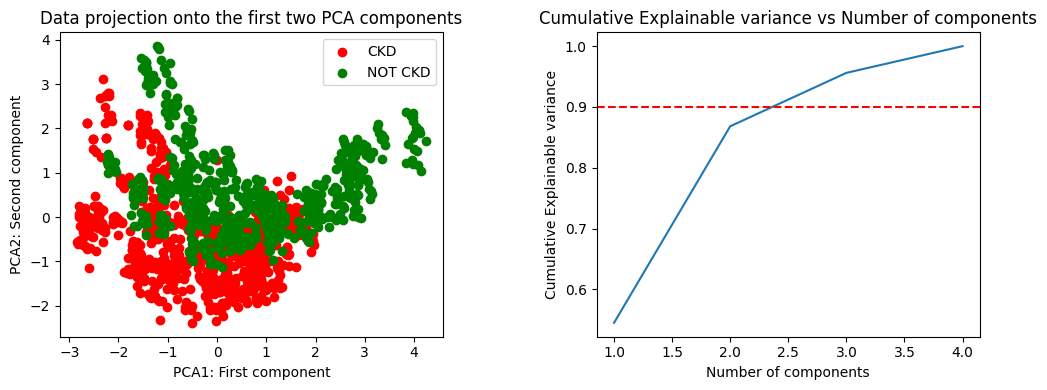

In [18]:
X_train, X_test, y_train, y_test, cv = prepare_training_data(df_bank, 'classification', use_pca=True, threshold_variance_ratio=0.90)

Going through each model defined in the dictionnary...:   0%|          | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 48 candidates, totalling 240 fits


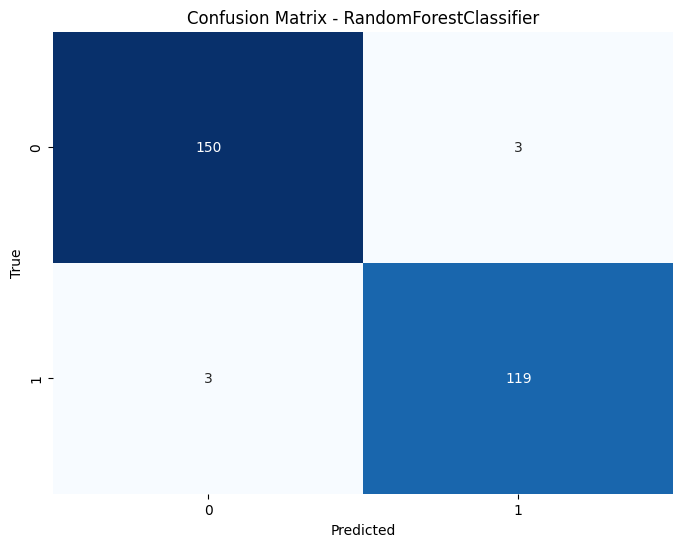

Model: RandomForestClassifier
Accuracy: 0.9781818181818182
Precision: 0.9754098360655737
Recall: 0.9754098360655737
ROC-AUC: 0.9987678131361833




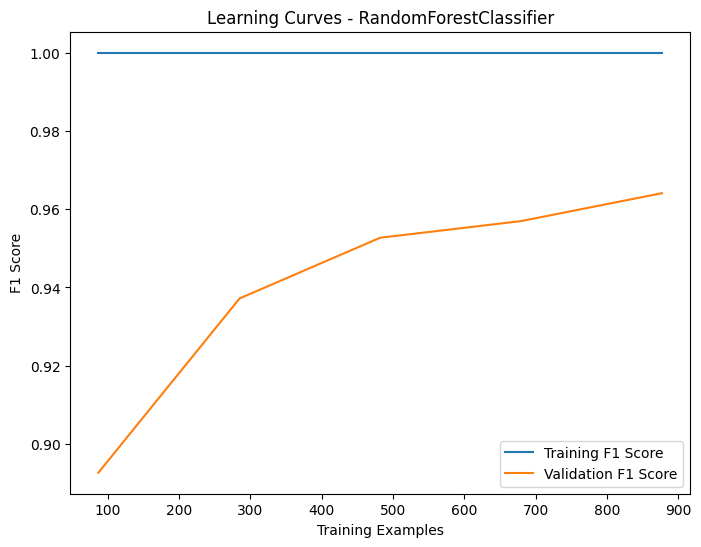

Going through each model defined in the dictionnary...:  17%|█▋        | 1/6 [00:06<00:33,  6.76s/it]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


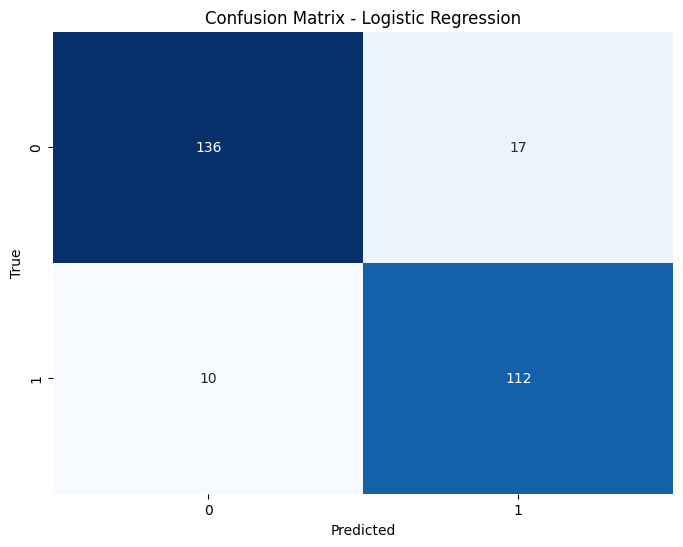

Model: Logistic Regression
Accuracy: 0.9018181818181819
Precision: 0.8682170542635659
Recall: 0.9180327868852459
ROC-AUC: 0.9615343405121611




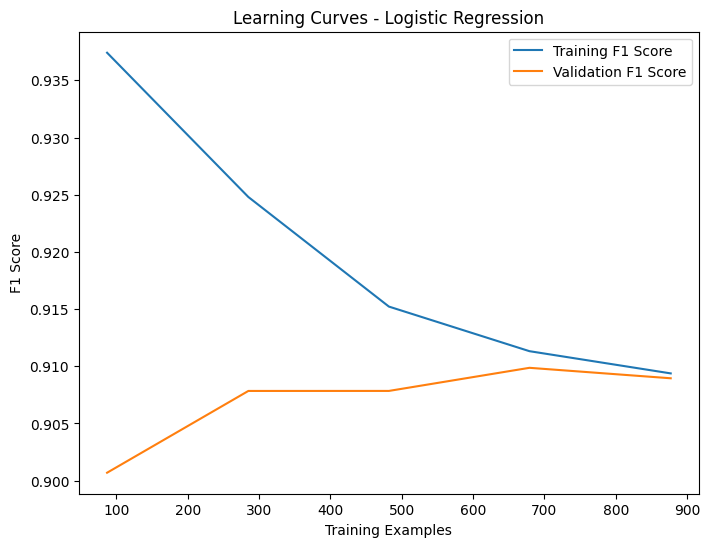

Going through each model defined in the dictionnary...:  33%|███▎      | 2/6 [00:07<00:12,  3.03s/it]

Fitting 5 folds for each of 32 candidates, totalling 160 fits


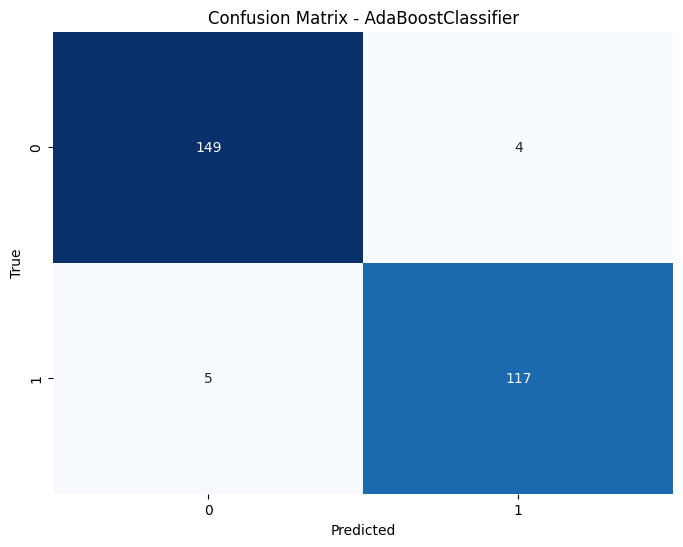

Model: AdaBoostClassifier
Accuracy: 0.9672727272727273
Precision: 0.9669421487603306
Recall: 0.9590163934426229
ROC-AUC: 0.9923925854494803




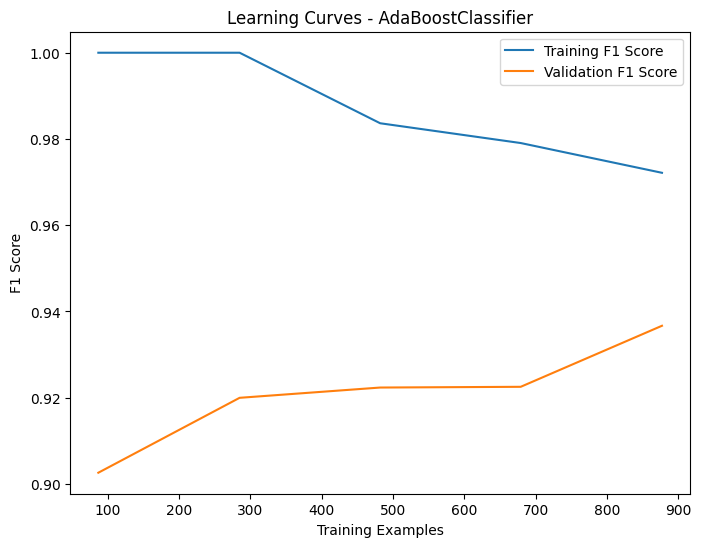

Going through each model defined in the dictionnary...:  50%|█████     | 3/6 [00:12<00:12,  4.16s/it]

Fitting 5 folds for each of 24 candidates, totalling 120 fits


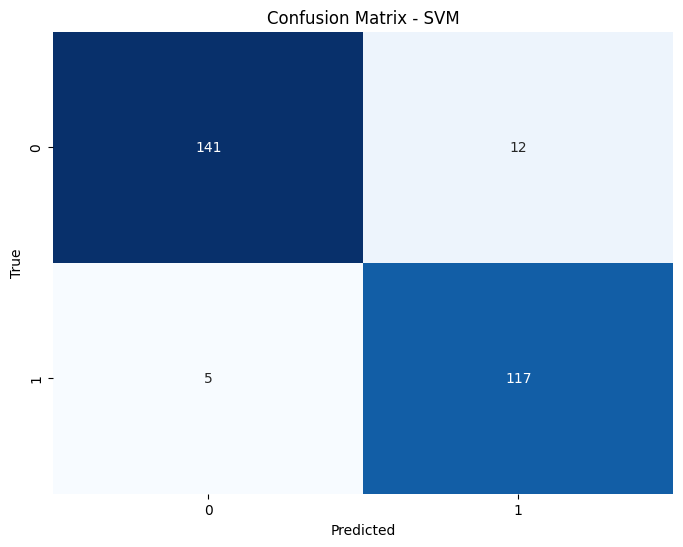

Model: SVM
Accuracy: 0.9381818181818182
Precision: 0.9069767441860465
Recall: 0.9590163934426229
ROC-AUC: 0.9902496517732776




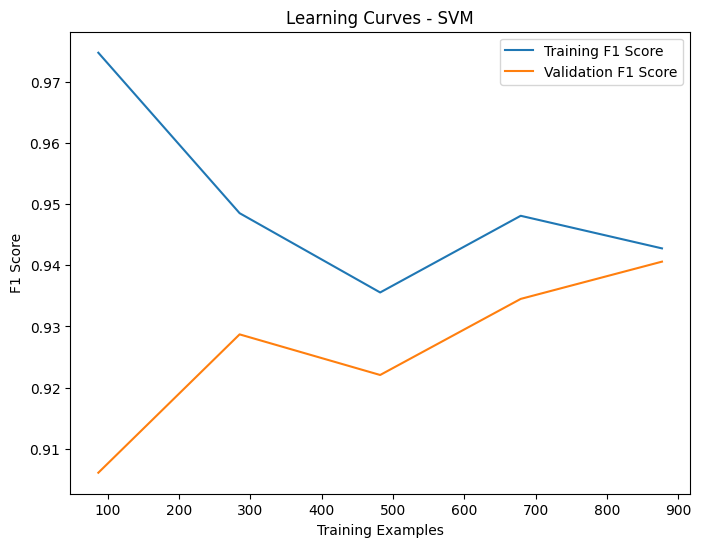

Going through each model defined in the dictionnary...:  67%|██████▋   | 4/6 [00:14<00:06,  3.41s/it]

Fitting 5 folds for each of 16 candidates, totalling 80 fits


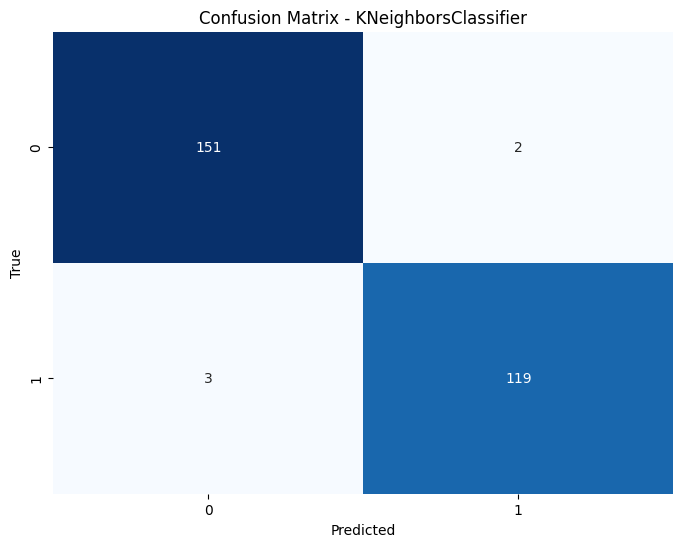

Model: KNeighborsClassifier
Accuracy: 0.9818181818181818
Precision: 0.9834710743801653
Recall: 0.9754098360655737
ROC-AUC: 0.9988749598199936




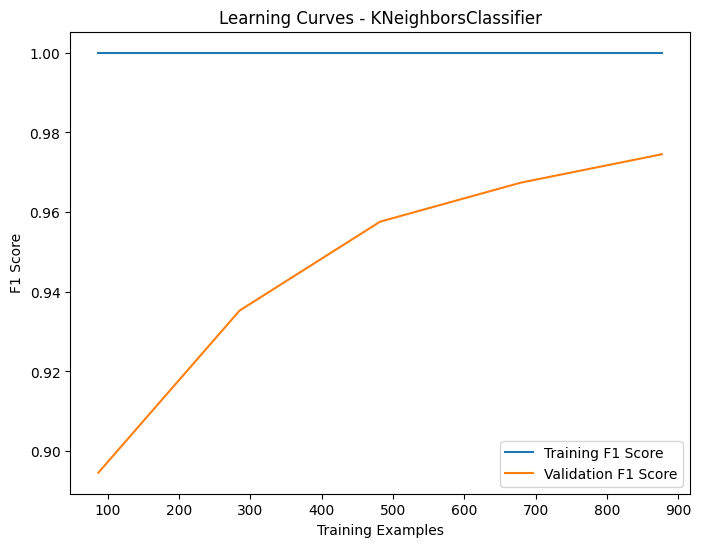

Going through each model defined in the dictionnary...:  83%|████████▎ | 5/6 [00:15<00:02,  2.31s/it]

Fitting 5 folds for each of 54 candidates, totalling 270 fits


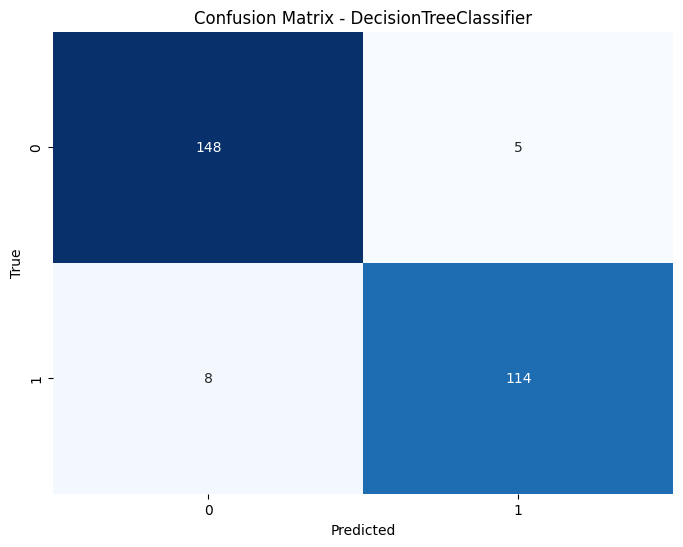

Model: DecisionTreeClassifier
Accuracy: 0.9527272727272728
Precision: 0.957983193277311
Recall: 0.9344262295081968
ROC-AUC: 0.9508732454730525




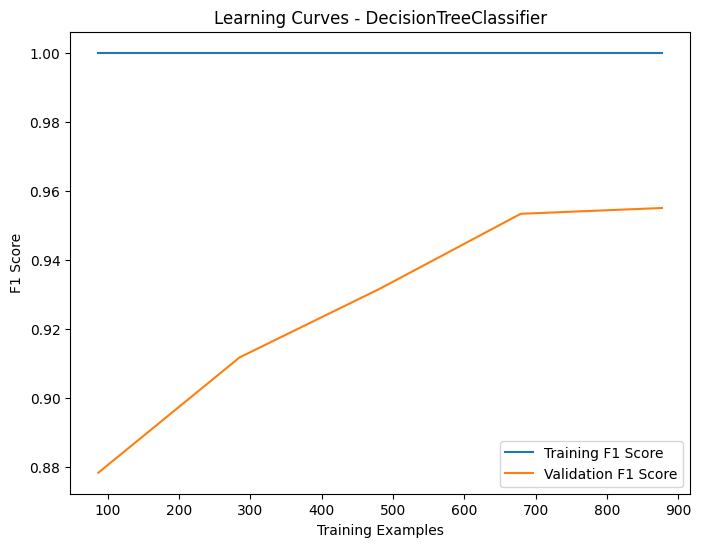

Going through each model defined in the dictionnary...: 100%|██████████| 6/6 [00:15<00:00,  2.63s/it]


In [19]:
display_results(dict_models, X_train, y_train, X_test, y_test, cv, 'f1 scoring on Bank Notes data(%)')

**Comments on Model performance**

The models perform well on the kidney dataset which contains a large number of features, in comparison with the bank notes dataset with fewer columns. Remarkably, the KNeighborsClassifier outperforms the other classifiers on various metrics, with random forest and adaboost placing second and third. 

This can be explained by the fact that KNN is an intuitive algorithm that doesn't require a complex model structure, and its decision-making is based on local patterns in the data.

# Code good practices

Programming is not just about writing code that works; it's also about writing code that is maintainable, readable, and efficient. Good programming practices contribute to the overall quality of code, making it easier to understand, modify, and collaborate on. Here are some essential good programming practices that we tried to follow in our work.

### Code redability

- Use meaningful variable and function names: Choose names that clearly convey the purpose of the variable or function.
- Maintain consistent line length: try to avoid lines longer than 80-120 characters

### Modularity 

- Break code into functions or classes: Divide your code into smaller, reusable modules. This promotes code reuse and makes it easier to understand.

### Comments and documentation 

- Write clear comments: Use comments to explain complex logic, assumptions, or any non-obvious aspects of your code.
- Provide documentation: Include docstrings to describe the purpose, parameters, and return values of functions or methods.

###  Other good practices

- Implement proper error handling: Anticipate and handle exceptions gracefully to prevent unexpected crashes.
- Use version control systems (e.g., Git): Keep track of changes, collaborate with others, and easily revert to previous versions if needed.
- Optimize when necessary: Identify bottlenecks and optimize critical sections of your code. However, prioritize readability over premature optimization.

### Conclusion 

Adhering to good programming practices is crucial for writing code that is not only functional but also maintainable, scalable, and collaborative. By following these practices, you contribute to the creation of high-quality software that stands the test of time. Remember, writing code is not just about solving a problem; it's about solving it in the best possible way.